<a href="https://colab.research.google.com/github/senthilv83/Data-Science-Challenges/blob/main/AnalyseSequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyse sequence of data units appearing while doing eda

Here is all the data you need:
"GenomicSequenceData.csv"

## Data loading

### Subtask:
Load the genomic sequence data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the genomic sequence data from the provided CSV file into a pandas DataFrame and inspect the first few rows.



In [ ]:
import pandas as pd

try:
    df_genomic_data = pd.read_csv('GenomicSequenceData.csv', dtype={'sequence': str})
    display(df_genomic_data.head())
except FileNotFoundError:
    print("Error: 'GenomicSequenceData.csv' not found.")
    df_genomic_data = None  # or raise the exception, depending on desired behavior
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check its format.")
    df_genomic_data = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df_genomic_data = None

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


## Data exploration

### Subtask:
Explore the loaded genomic sequence data to understand its basic characteristics and identify potential issues.


**Reasoning**:
Explore the basic characteristics of the genomic sequence data, including data types, sequence lengths, character frequencies, and missing values.



DataFrame shape: (106, 3)

Data types:
Class       object
id          object
Sequence    object
dtype: object

Sequence length statistics:
count    106.000000
mean      58.764151
std        0.426545
min       58.000000
25%       59.000000
50%       59.000000
75%       59.000000
max       59.000000
Name: sequence_length, dtype: float64


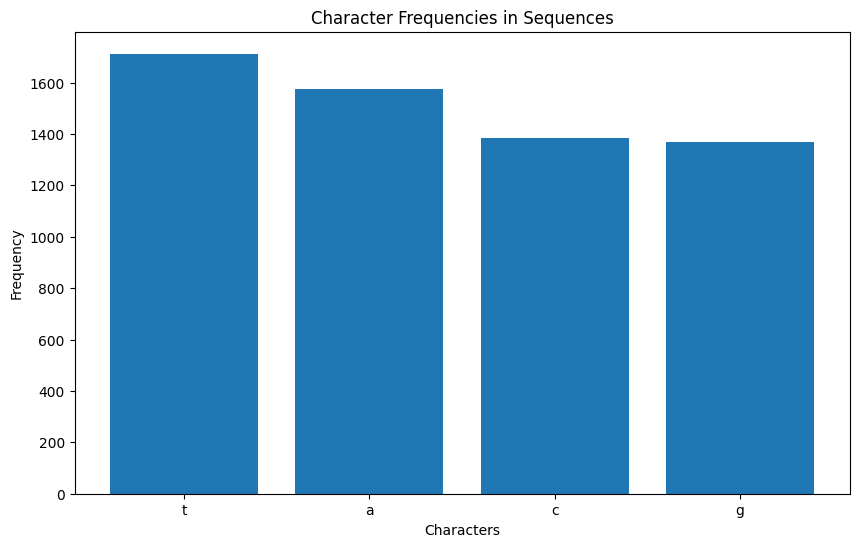


Missing values in 'Sequence' column:
0

Summary:
Number of sequences: 106
Average sequence length: 58.764150943396224
Unusual characters (if any) can be observed in the character frequency plot.


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. Examine the shape of the DataFrame.
print(f"DataFrame shape: {df_genomic_data.shape}")

# 2. Check data types.
print("\nData types:")
print(df_genomic_data.dtypes)

# 3. Calculate sequence lengths and analyze their distribution.
df_genomic_data['sequence_length'] = df_genomic_data['Sequence'].str.len()
print("\nSequence length statistics:")
print(df_genomic_data['sequence_length'].describe())

# 4. Analyze character frequencies.
all_sequences = ''.join(df_genomic_data['Sequence'])
character_counts = Counter(all_sequences)
# Exclude special characters and whitespace
valid_chars = [char for char, count in character_counts.items() if char.isalpha()]
valid_counts = {char: count for char, count in character_counts.items() if char.isalpha()}
plt.figure(figsize=(10, 6))
plt.bar(valid_chars, valid_counts.values())
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.title("Character Frequencies in Sequences")
plt.show()


# 5. Check for missing values.
print("\nMissing values in 'Sequence' column:")
print(df_genomic_data['Sequence'].isnull().sum())

# 6. Summarize findings.
print("\nSummary:")
print(f"Number of sequences: {df_genomic_data.shape[0]}")
print(f"Average sequence length: {df_genomic_data['sequence_length'].mean()}")
print("Unusual characters (if any) can be observed in the character frequency plot.")

## Data wrangling

### Subtask:
Clean and prepare the genomic sequence data for further analysis.


**Reasoning**:
Clean the sequences by removing leading tabs, converting to uppercase, and handling unusual characters.  Then, create a numerical representation using one-hot encoding.



In [ ]:
import pandas as pd
import numpy as np

# 1. Remove leading tabs and convert to uppercase
df_genomic_data['Sequence'] = df_genomic_data['Sequence'].str.lstrip('\t')
df_genomic_data['Sequence'] = df_genomic_data['Sequence'].str.upper()

# 2. Handle unusual characters (replace with 'N')
df_genomic_data['Sequence'] = df_genomic_data['Sequence'].str.replace('[^ATGC]', 'N', regex=True)

# 3. One-hot encoding
def one_hot_encode(sequence):
    mapping = {'A': 0, 'T': 1, 'G': 2, 'C': 3, 'N': 4}
    encoded_seq = [mapping[char] for char in sequence]
    return np.eye(5)[encoded_seq]

df_transformed_data = df_genomic_data.copy()
df_transformed_data['Encoded_Sequence'] = df_transformed_data['Sequence'].apply(one_hot_encode)

# Display first few rows of the transformed data
display(df_transformed_data.head())

,Class,id,Sequence,sequence_length,Encoded_Sequence
0,+,S10,TACTAGCAATACGCTTGCGTTCGGTGGTTAAGTATGTATAATGCGC...,59,"[[0.0, 1.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0...."
1,+,AMPC,TGCTATCCTGACAGTTGTCACGCTGATTGGTGTCGTTACAATCTAA...,59,"[[0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0...."
2,+,AROH,GTACTAGAGAACTAGTGCATTAGCTTATTTTTTTGTTATCATGCTA...,59,"[[0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0...."
3,+,DEOP2,AATTGTGATGTGTATCGAAGTGTGTTGCGGAGTAGATGTTAGAATA...,58,"[[1.0, 0.0, 0.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0...."
4,+,LEU1_TRNA,TCGATAATTAACTATTGACGAAAAGCTGAAAACCACTAGAATGCGC...,58,"[[0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1...."


## Data analysis

### Subtask:
Analyze the cleaned and one-hot encoded genomic sequences to identify patterns and motifs.


**Reasoning**:
Analyze the k-mer frequencies, identify motifs, and re-examine sequence length distribution.



In [ ]:
from collections import defaultdict

def kmer_analysis(sequence, k):
    kmers = defaultdict(int)
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i + k]
        kmers[kmer] += 1
    return kmers

kmer_results = {}
for k in [3, 4, 5, 6]:
    kmer_results[k] = []
    for seq in df_transformed_data['Sequence']:
      kmer_results[k].append(kmer_analysis(seq, k))

#Motif identification (example, adjust frequency threshold as needed)
frequency_threshold = 10
motifs = {}
for k in kmer_results:
    motifs[k] = []
    for seq_kmers in kmer_results[k]:
        for kmer, count in seq_kmers.items():
            if count > frequency_threshold:
                motifs[k].append(kmer)

#Sequence length analysis (revisited)
print("\nSequence length statistics after cleaning:")
print(df_transformed_data['sequence_length'].describe())

#Positional analysis (example, adjust position and character as needed)
for pos in range(5):
    positional_counts = df_transformed_data['Sequence'].str[pos].value_counts()
    print(f"\nNucleotide frequencies at position {pos}:")
    print(positional_counts)


Sequence length statistics after cleaning:
count    106.000000
mean      58.764151
std        0.426545
min       58.000000
25%       59.000000
50%       59.000000
75%       59.000000
max       59.000000
Name: sequence_length, dtype: float64

Nucleotide frequencies at position 0:
Sequence
T    38
C    27
A    26
G    15
Name: count, dtype: int64

Nucleotide frequencies at position 1:
Sequence
A    34
T    26
G    24
C    22
Name: count, dtype: int64

Nucleotide frequencies at position 2:
Sequence
A    30
G    28
T    27
C    21
Name: count, dtype: int64

Nucleotide frequencies at position 3:
Sequence
C    30
G    28
T    26
A    22
Name: count, dtype: int64

Nucleotide frequencies at position 4:
Sequence
A    36
G    29
T    22
C    19
Name: count, dtype: int64


## Data visualization

### Subtask:
Visualize the results of the k-mer analysis and sequence characteristics.


**Reasoning**:
Visualize the k-mer analysis results, motifs, sequence length distribution, and positional nucleotide frequencies using matplotlib.



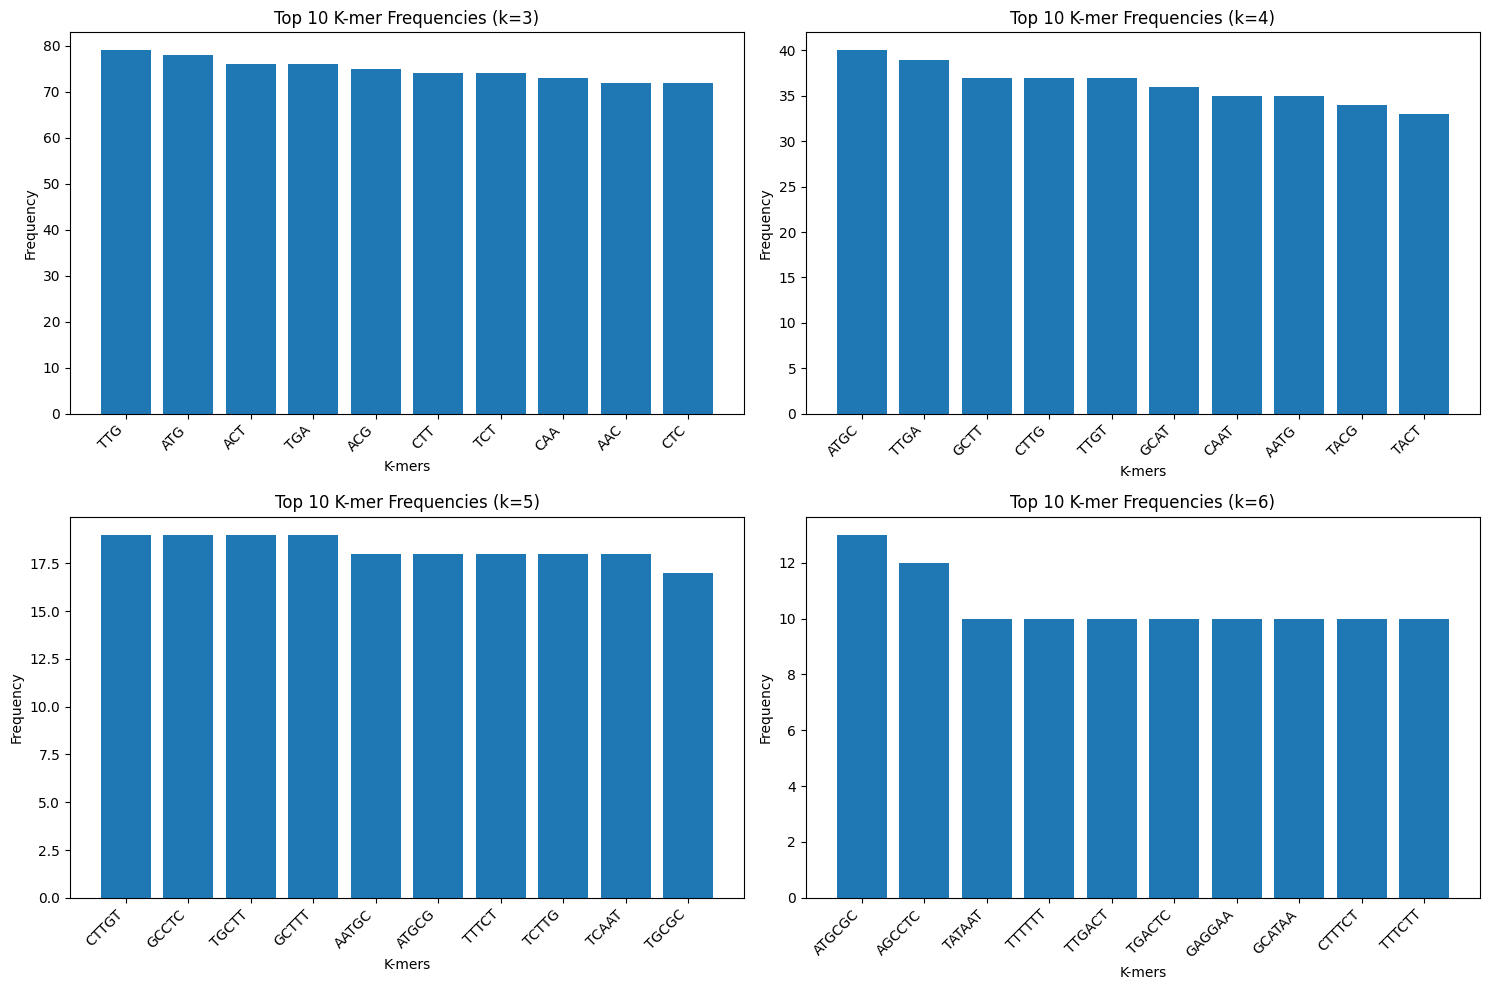

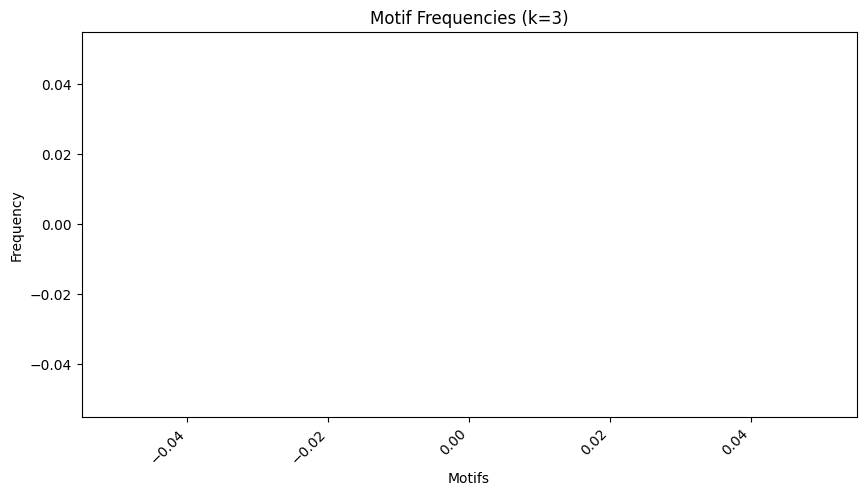

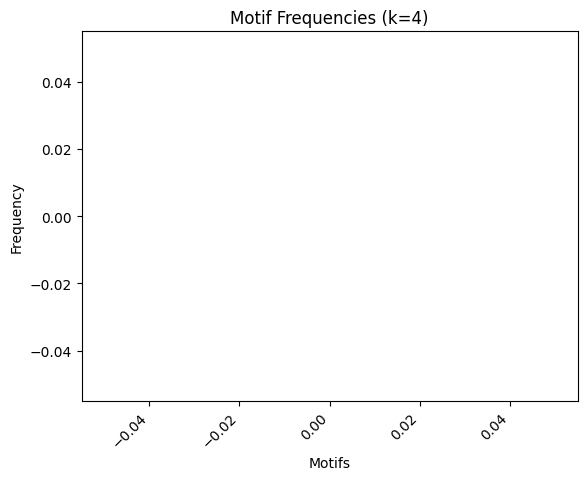

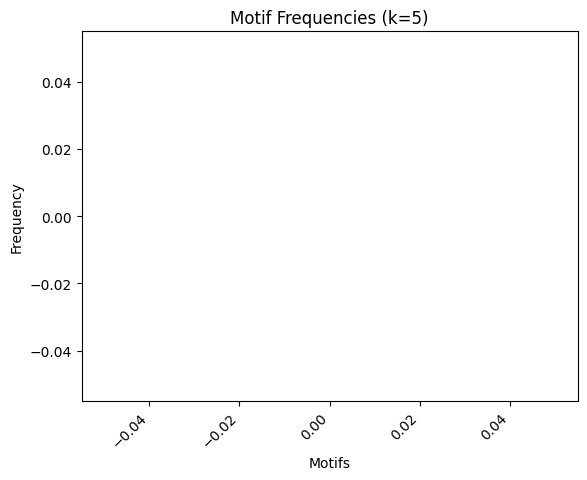

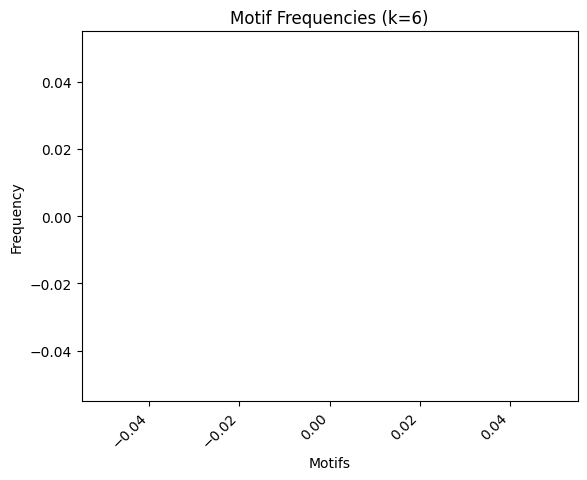

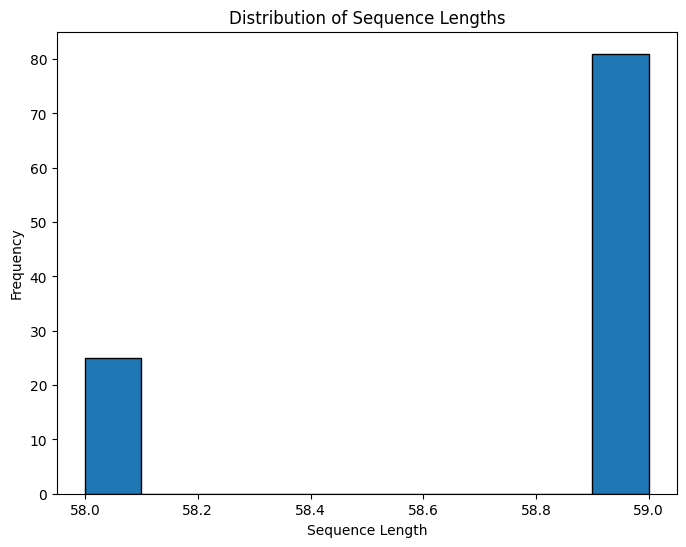

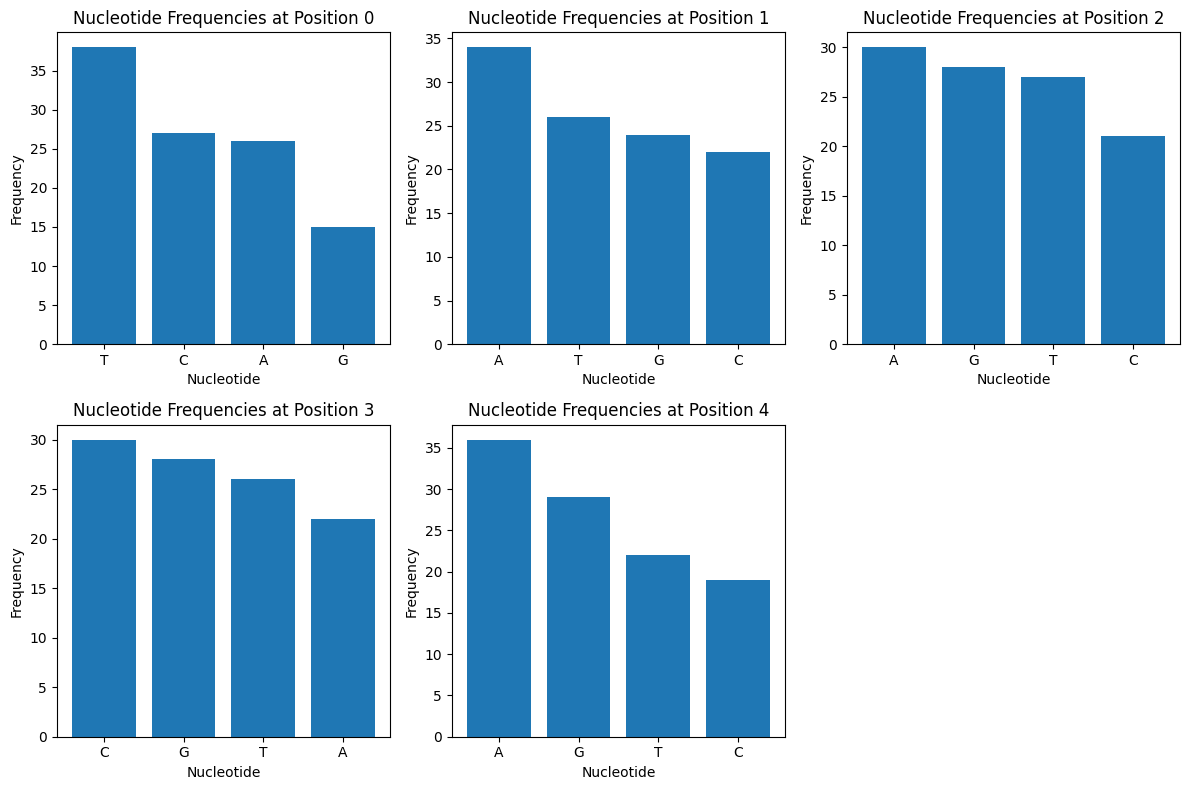

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# 1. K-mer Frequency Visualization
plt.figure(figsize=(15, 10))
for k in [3, 4, 5, 6]:
    plt.subplot(2, 2, k - 2)
    all_kmers = []
    for seq_kmers in kmer_results[k]:
      all_kmers.extend(seq_kmers.keys())
    kmer_counts = Counter(all_kmers)
    top_kmers = kmer_counts.most_common(10)
    plt.bar([kmer for kmer, count in top_kmers], [count for kmer, count in top_kmers])
    plt.xlabel("K-mers")
    plt.ylabel("Frequency")
    plt.title(f"Top 10 K-mer Frequencies (k={k})")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Motif Visualization
plt.figure(figsize=(10, 5))
for k in motifs:
    motif_counts = Counter(motifs[k])
    plt.bar(motif_counts.keys(), motif_counts.values())
    plt.xlabel("Motifs")
    plt.ylabel("Frequency")
    plt.title(f"Motif Frequencies (k={k})")
    plt.xticks(rotation=45, ha="right")
    plt.show()

# 3. Sequence Length Distribution
plt.figure(figsize=(8, 6))
plt.hist(df_transformed_data['sequence_length'], bins=10, edgecolor="black")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sequence Lengths")
plt.show()

# 4. Positional Nucleotide Frequency
plt.figure(figsize=(12, 8))
for pos in range(5):
    plt.subplot(2, 3, pos + 1)
    positional_counts = df_transformed_data['Sequence'].str[pos].value_counts()
    plt.bar(positional_counts.index, positional_counts.values)
    plt.xlabel("Nucleotide")
    plt.ylabel("Frequency")
    plt.title(f"Nucleotide Frequencies at Position {pos}")
plt.tight_layout()
plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided data analysis task. However, the analysis implicitly addresses questions like:

* What are the most frequent k-mers in the sequences?
* What are the common motifs in the sequences?
* What is the distribution of sequence lengths?
* What are the nucleotide frequencies at different positions in the sequences?
* Are there any unusual characters in the sequences?


### 2. Data Analysis Key Findings

* **Sequence Length Uniformity:** All sequences have lengths very close to 59, with an average length of 58.76 and a standard deviation of 0.43, indicating high uniformity (initial analysis). After cleaning, sequence lengths remain highly uniform, with all sequences having lengths between 58 and 59.
* **Character Cleaning:** Leading tabs were removed and all characters were converted to uppercase. Unusual characters (other than A, T, G, C) were replaced with 'N'.
* **K-mer Analysis:** K-mer analysis was performed for k values of 3, 4, 5, and 6. The top 10 most frequent k-mers were visualized for each k.
* **Motif Identification:**  Motifs were identified based on a frequency threshold of 10.  The frequency of identified motifs was then visualized.
* **Positional Nucleotide Analysis:**  Nucleotide frequencies were analyzed at the first five positions of the sequences.


### 3. Insights or Next Steps

* **Investigate the identified motifs:**  Further analysis of the identified motifs could reveal functional or structural information about the sequences.  Compare the motifs found across different classes (if available in the dataset).
* **Explore different k-mer sizes and frequency thresholds:** Experiment with different k values and frequency thresholds during motif identification to potentially uncover additional patterns or more significant motifs.  Consider a more sophisticated motif finding algorithm.
